# Sommaire

* [Prédiction du prix moyen d'une maison en fonction de ses caractéristiques](#intro)
* [Importation des données](#import)
* [Nettoyage des données](#cleaning)
* [Encoding de "ocean_proximity"](#encoding)
* [Clustering des données](#clustering)
* [Suppression des features non pertinentes](#pert)
* [Scaling des données](#scaling)
* [Importation du modèle](#model)

In [4]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report

from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve

from sklearn.model_selection import learning_curve

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.inspection import permutation_importance
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
from sklearn.preprocessing import RobustScaler

## Prédiction du prix moyen d'une maison en fonction de ses caractéristiques <a class="anchor" id="intro"></a>

Bonjour,

Ce fichier Jupyter Notebook servira à prédire le prix moyen d'une maison en fonction de ses caractéristiques. Ce fichier Jupyter vous permettra d'importer vos fichiers, les traitera et créera un modèle déterminant un prix.

Une fois ce modèle effectué, vous pourrez alors rentrer les caractéristiques d'une maison et un prix vous sera donné en retour.

## Importation des données : <a class="anchor" id="import"></a>

Pour l'importation, il vous est nécessaire de rentrer le chemin dans la cellule ci-dessous 
(exemple de chemin : ""C:/Users/Simplon/Desktop/California Dreamin/california housing.csv"

In [47]:
df = pd.read_csv("Chemin de votre fichier")

## Nettoyage des données <a class="anchor" id="cleaning"></a>

Lancer les cellules suivantes afin de nettoyer votre jeu de données.

In [48]:
df.drop(df.columns[0], axis=1, inplace=True)

In [49]:
df=df.drop_duplicates(subset=['longitude', 'latitude','households','population'], keep="first")

In [50]:
df[['total_bedrooms', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value']] = df[['total_bedrooms', 'housing_median_age', 'total_rooms', 'population', 'households', 'median_income', 'median_house_value']].replace(0, np.nan)

In [51]:
ndf=df.dropna()

## Encoding de "ocean_proximity" <a class="anchor" id="encoding"></a>

In [52]:
ndf.apply(pd.Series.nunique)

longitude               827
latitude                839
housing_median_age       52
total_rooms            5468
total_bedrooms         1828
population             3645
households             1701
median_income         10804
median_house_value     3674
ocean_proximity           5
dtype: int64

In [53]:
copy_df = ndf.copy()

In [54]:
copy_df=copy_df.drop(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'],axis=1)

In [55]:
copy_df['ocean_proximity'].replace({'ISLAND': '1', 'NEAR OCEAN': '2', 'NEAR BAY': '3', '<1H OCEAN': '4', 'INLAND': '5'}, inplace=True)

In [56]:
copy_df = pd.to_numeric(copy_df['ocean_proximity'])

In [57]:
copy_df = copy_df.to_frame()

In [58]:
copy_df=copy_df.rename(columns={'ocean_proximity': 'proximity'})
ndf=pd.concat([ndf,copy_df], axis=1)

In [59]:
one_hot = pd.get_dummies(ndf['proximity'])
ndf = ndf.drop('proximity',axis=1)
ndf = ndf.join(one_hot)

In [60]:
ndf=ndf.rename(columns={1 :'ISLAND', 2:'NEAR OCEAN', 3 :'NEAR BAY', 4 :'<1H OCEAN', 5 :'INLAND'})
df=ndf.drop(['ocean_proximity'],axis=1)

## Clustering des données  <a class="anchor" id="clustering"></a>

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

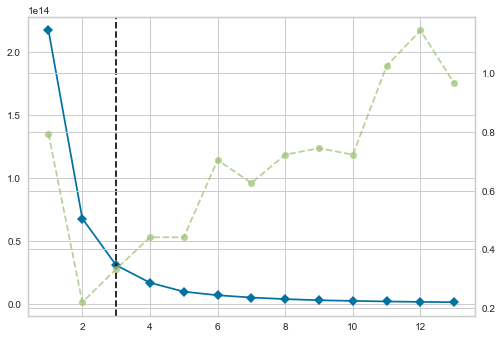

In [61]:
model = KMeans(random_state=50)
visualizer = KElbowVisualizer(model, k =(1,14))
visualizer.fit(df)

In [91]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [93]:
y_predicted=km.fit_predict(df)

In [64]:
df['cluster']=km.fit_predict(df)

## Suppression des features non pertinentes <a class="anchor" id="pert"></a>

In [65]:
ndf = df.drop(columns=['housing_median_age','ISLAND','total_rooms'],axis=1) 

## Scaling des données <a class="anchor" id="scaling"></a>

In [66]:
X2 = ndf.drop(columns=['median_house_value'],axis=1)
y1 = ndf['median_house_value']

In [67]:
rs=RobustScaler()
X1=rs.fit_transform(X2)

## Importation du modèle <a class="anchor" id="model"></a>

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2,random_state=0)

In [83]:
knn = pickle.load(open("knn.pkl","rb"))

In [84]:
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [85]:
pred = knn.predict(X_test)

In [86]:
knn.score(X_test, y_test)

0.87679545343452